In [ ]:
import pandas as pd

# Lee solo las primeras 20,000 filas del archivo JSON por cuestiones de rendimiento
df = pd.read_json('D:\\HENRY REPO\\Proyecto Final\\GOOGLE MAPS\\review-New_York-20250422T235820Z-001\\review-New_York\\15.json', lines=True, nrows=200000)

df.head()

C:\Users\jhnnc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.127843e+20,Elio Gordische,1501866677829,5,Nice place to purchase your new car,None,None,0x89c2f29c3bbedc31:0xc9b6b30c5182c74f
1,1.008193e+20,Gabriel Irizarry,1536074481409,5,vehicle service promptly and efficiently,None,None,0x89c2f29c3bbedc31:0xc9b6b30c5182c74f
2,1.068602e+20,Prince Pp,1502805168676,5,The guy was nice n quick,None,None,0x89c2f29c3bbedc31:0xc9b6b30c5182c74f
3,1.102641e+20,William Conklin,1556626581792,1,Its no longer there now a gas station only,None,None,0x89c2f29c3bbedc31:0xc9b6b30c5182c74f
4,1.134145e+20,Dana Reig,1494603827231,3,Kind of tight at the pump and a little tough t...,None,None,0x89c2f29c3bbedc31:0xc9b6b30c5182c74f


In [2]:
# Tamaño de Dataset

df.shape 

(150000, 8)

In [3]:
# Observacion de los tipos de datos del dataset y mas informacion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     87514 non-null   object 
 5   pics     5593 non-null    object 
 6   resp     15253 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [4]:
df.dtypes


# Columnas como postal_code, latitude, longitude, stars, review_count, is_open, contienen valores numericos sin embargo estan respresentados como object
# Tambien observamos que todas las columnas estan repetidas y solo son correctas desde "business_id" hasta ""hours" 

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object

In [5]:
# Obsevamos las columnas del dataset

df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [6]:
# OBERVAMOS VALORES UNICOS

print('\nvalores unicos is_open: ', df.rating.unique())



valores unicos is_open:  [5 1 3 4 2]


## Visualización general

heatmap de correlación (Mapa de correlaciones)

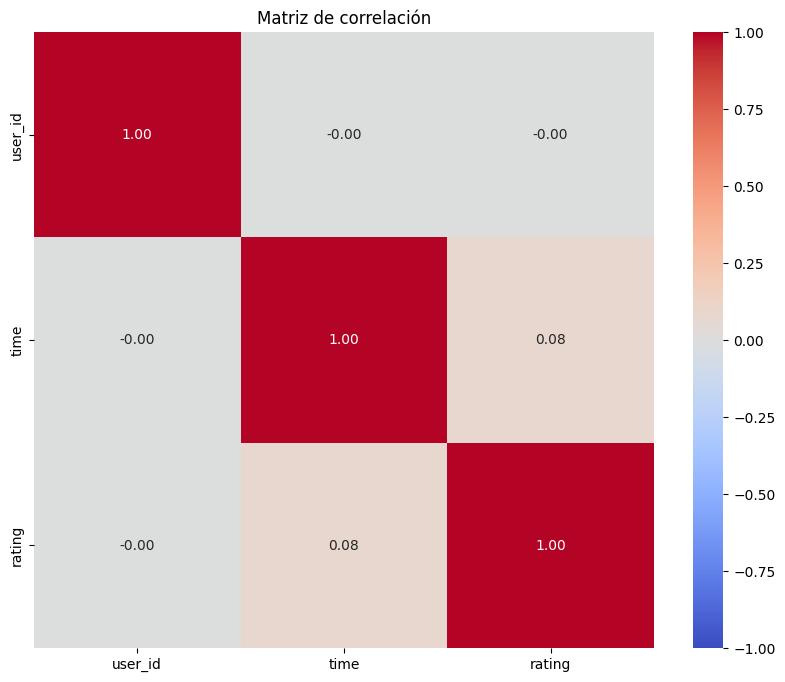

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.fillna('NAN').corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

No se puede observar alguna relacion entre las columnas

## Valores faltantes (Missing values)

In [8]:
# Verificamos si existen valores nulos

df.isnull().sum()

user_id         0
name            0
time            0
rating          0
text        62486
pics       144407
resp       134747
gmap_id         0
dtype: int64

In [9]:
#porcentaje de nulos

df.isnull().mean() * 100

user_id     0.000000
name        0.000000
time        0.000000
rating      0.000000
text       41.657333
pics       96.271333
resp       89.831333
gmap_id     0.000000
dtype: float64

In [10]:
!pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: C:\Users\jhnnc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<AxesSubplot: >

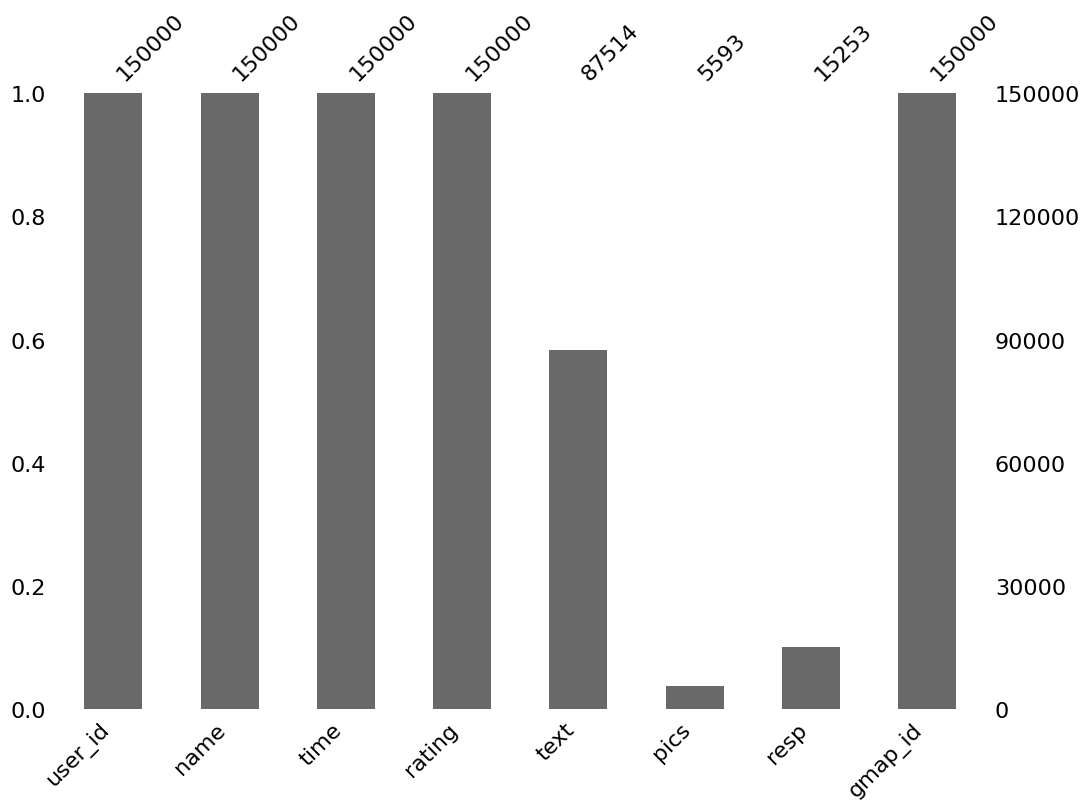

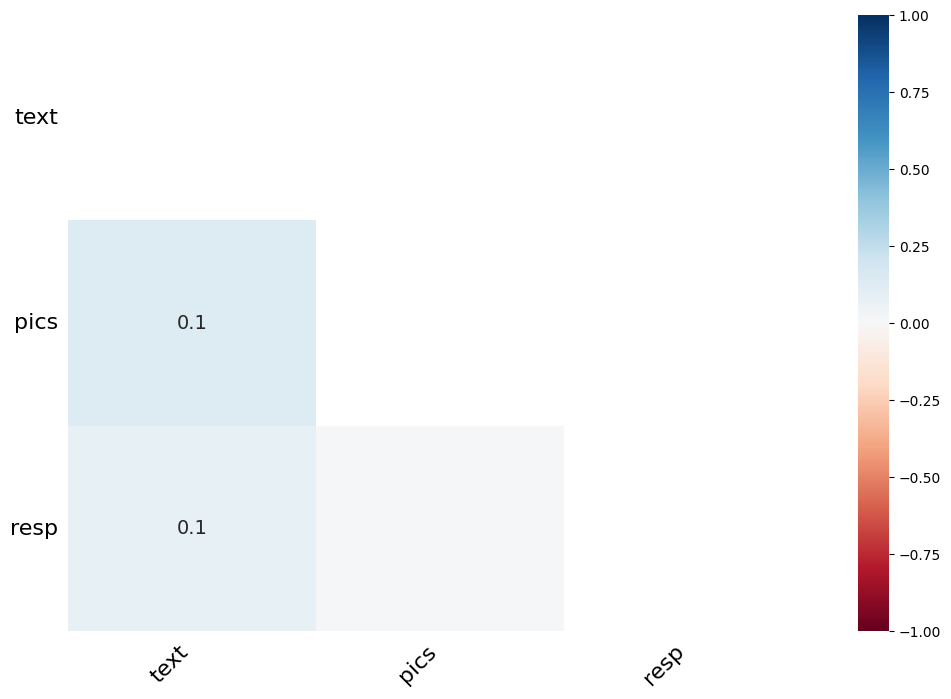

In [11]:
import missingno as msno
import pandas as pd

# Ver el gráfico de valores faltantes por columna
msno.bar(df, figsize=(12,8))

# Ver el mapa de calor de correlaciones entre valores nulos
msno.heatmap(df, figsize=(12,8))

## Duplicados

In [12]:
df.iloc[:, [0,1,2,3,4,7]].duplicated().sum()

2350

## Distribución y valores atípicos (outliers)

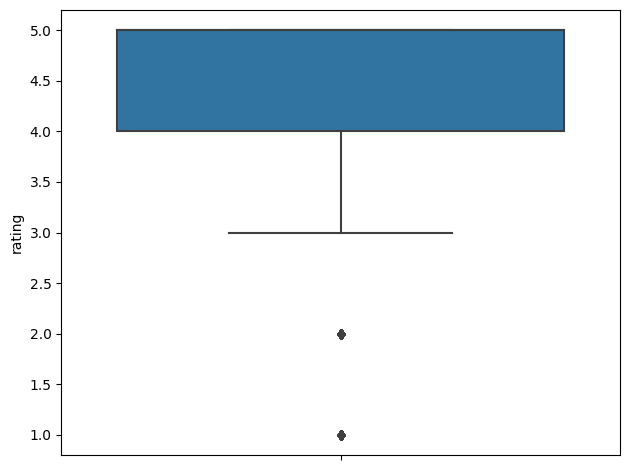

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(y=df['rating'])
 

# Ajustamos espacios
plt.tight_layout()
plt.show()